Nama: Lis Wahyuni

Download dataset from Kaggle

In [12]:
!pip install -q kaggle

In [13]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"liswahyuni","key":"755a70295838cc1d8a2eb09504e11f93"}'}

In [14]:
!mkdir -p ~/.kaggle

In [15]:
!cp /content/kaggle.json ~/.kaggle/

In [16]:
# Permission for the json to act
!chmod 600 ~/.kaggle/kaggle.json

In [17]:
# List all datasets in Kaggle
!kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              233KB  2021-09-03 10:07:19          11586  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           7027  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           2727  
promptcloud/careerbuilder-job-listing-2020                  Careerbuilder Job Listing 2020                     42MB  2021-03-05 06:59:52           1784  
dhruvildave/wikibooks-dataset                               Wikibooks Datase

In [18]:
!kaggle datasets download -d rahulanand0070/youtubevideodataset

  0% 0.00/4.80M [00:00<?, ?B/s]
100% 4.80M/4.80M [00:00<00:00, 78.6MB/s]


In [19]:
!ls

kaggle.json  sample_data  youtubevideodataset.zip


In [20]:
!unzip youtubevideodataset.zip

Archive:  youtubevideodataset.zip
  inflating: Youtube Video Dataset.csv  


In [21]:
import pandas as pd

In [22]:
df = pd.read_csv('Youtube Video Dataset.csv')
df

,Title,Videourl,Category,Description
0,Madagascar Street Food!!! Super RARE Malagasy ...,/watch?v=EwBA1fOQ96c,Food,🎥GIANT ALIEN SNAIL IN JAPAN! » https://youtu.b...
1,42 Foods You Need To Eat Before You Die,/watch?v=0SPwwpruGIA,Food,This is the ultimate must-try food bucket list...
2,Gordon Ramsay’s Top 5 Indian Dishes,/watch?v=upfu5nQB2ks,Food,We found 5 of the best and most interesting In...
3,How To Use Chopsticks - In About A Minute 🍜,/watch?v=xFRzzSF_6gk,Food,You're most likely sitting in a restaurant wit...
4,Trying Indian Food 1st Time!,/watch?v=K79bXtaRwcM,Food,HELP SUPPORT SINSTV!! Shop Our Sponsors!\nLast...
...,...,...,...,...
11206,"art journal | shimmer sprays, stencils, collag...",/watch?v=mJBOQr_-8_Y,Art&Music,Step by step video on creating an art journal ...
11207,Ar-Tea Collage * Mixed Media Art,/watch?v=GOihUhnZxtw,Art&Music,"By: Ilene McInnes,\nMixed media Art and inspir..."
11208,DIY Mixed Media Art Collage Greeting Cards / M...,/watch?v=BchUtLfjews,Art&Music,Make your own Mixed Media Greeting Cards\n\nHe...
11209,Art Collage Process DecoJournal using Rice Pap...,/watch?v=FlQ_j-cflQc,Art&Music,Art Collage Process DecoJournal using Rice Pap...


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11211 entries, 0 to 11210
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        11211 non-null  object
 1   Videourl     11211 non-null  object
 2   Category     11211 non-null  object
 3   Description  11128 non-null  object
dtypes: object(4)
memory usage: 350.5+ KB


# **Specify the "Category" using "Description" of video**

In [24]:
# Proses one-hot-encoding
dum_cate = pd.get_dummies(df.Category)
df_baru = pd.concat([df, dum_cate], axis=1)
df_baru = df_baru.drop(columns='Category')
df_baru

,Title,Videourl,Description,Art&Music,Food,History,Science&Technology,manufacturing,travel blog
0,Madagascar Street Food!!! Super RARE Malagasy ...,/watch?v=EwBA1fOQ96c,🎥GIANT ALIEN SNAIL IN JAPAN! » https://youtu.b...,0,1,0,0,0,0
1,42 Foods You Need To Eat Before You Die,/watch?v=0SPwwpruGIA,This is the ultimate must-try food bucket list...,0,1,0,0,0,0
2,Gordon Ramsay’s Top 5 Indian Dishes,/watch?v=upfu5nQB2ks,We found 5 of the best and most interesting In...,0,1,0,0,0,0
3,How To Use Chopsticks - In About A Minute 🍜,/watch?v=xFRzzSF_6gk,You're most likely sitting in a restaurant wit...,0,1,0,0,0,0
4,Trying Indian Food 1st Time!,/watch?v=K79bXtaRwcM,HELP SUPPORT SINSTV!! Shop Our Sponsors!\nLast...,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
11206,"art journal | shimmer sprays, stencils, collag...",/watch?v=mJBOQr_-8_Y,Step by step video on creating an art journal ...,1,0,0,0,0,0
11207,Ar-Tea Collage * Mixed Media Art,/watch?v=GOihUhnZxtw,"By: Ilene McInnes,\nMixed media Art and inspir...",1,0,0,0,0,0
11208,DIY Mixed Media Art Collage Greeting Cards / M...,/watch?v=BchUtLfjews,Make your own Mixed Media Greeting Cards\n\nHe...,1,0,0,0,0,0
11209,Art Collage Process DecoJournal using Rice Pap...,/watch?v=FlQ_j-cflQc,Art Collage Process DecoJournal using Rice Pap...,1,0,0,0,0,0


In [25]:
df_baru.drop(columns=['Title', 'Videourl'])

,Description,Art&Music,Food,History,Science&Technology,manufacturing,travel blog
0,🎥GIANT ALIEN SNAIL IN JAPAN! » https://youtu.b...,0,1,0,0,0,0
1,This is the ultimate must-try food bucket list...,0,1,0,0,0,0
2,We found 5 of the best and most interesting In...,0,1,0,0,0,0
3,You're most likely sitting in a restaurant wit...,0,1,0,0,0,0
4,HELP SUPPORT SINSTV!! Shop Our Sponsors!\nLast...,0,1,0,0,0,0
...,...,...,...,...,...,...,...
11206,Step by step video on creating an art journal ...,1,0,0,0,0,0
11207,"By: Ilene McInnes,\nMixed media Art and inspir...",1,0,0,0,0,0
11208,Make your own Mixed Media Greeting Cards\n\nHe...,1,0,0,0,0,0
11209,Art Collage Process DecoJournal using Rice Pap...,1,0,0,0,0,0


In [26]:
df_baru.Description=df_baru.Description.astype(str)

In [27]:
import numpy as np

In [28]:
# Ubah nilai-nilai dari df_baru ke tipe data numpy array
desc_values = df_baru['Description'].values
label = df_baru[['Art&Music', 'Food', 'History', 'Science&Technology', 'manufacturing', 'travel blog']].values

In [29]:
# split data jadi training-testing
from sklearn.model_selection import train_test_split
desc_values_train, desc_values_test, label_train, label_test = train_test_split(desc_values, label, test_size=0.2)

In [30]:
# Ubah tiap kata di dataset ke bilangan numerik menggunakan fungsi Tokenizer
# Lalu konversi tiap sample jadi sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

#YouTube gives us 5,000 characters (about 800 words) for the description 
tokenizer = Tokenizer(num_words=5000, oov_token='x') 
tokenizer.fit_on_texts(desc_values_train) 
tokenizer.fit_on_texts(desc_values_test)
	 
sekuens_train = tokenizer.texts_to_sequences(desc_values_train)
sekuens_test = tokenizer.texts_to_sequences(desc_values_test)
	 
padded_train = pad_sequences(sekuens_train) 
padded_test = pad_sequences(sekuens_test)

In [31]:
# Arsitektur model pakai layer Embedding, dimensi= 16, & dimensi dari input=num_words
import tensorflow as tf
from tensorflow import keras

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(6, activation='softmax')
])

model.compile(loss='categorical_crossentropy',optimizer=keras.optimizers.Adam(0.001),metrics=['accuracy'])

In [32]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9):
      print("\nAkurasi telah di atas 90%.")
      self.model.stop_training = True
callbacks = myCallback()

In [33]:
# Train model
result = model.fit(padded_train, label_train, epochs=100, 
                    validation_data=(padded_test, label_test), verbose=2, callbacks=[callbacks])


Epoch 1/100
281/281 - 151s - loss: 1.5385 - accuracy: 0.3262 - val_loss: 1.2171 - val_accuracy: 0.5216
Epoch 2/100
281/281 - 151s - loss: 1.0444 - accuracy: 0.5657 - val_loss: 0.9404 - val_accuracy: 0.6157
Epoch 3/100
281/281 - 150s - loss: 0.7882 - accuracy: 0.7052 - val_loss: 0.8143 - val_accuracy: 0.7098
Epoch 4/100
281/281 - 150s - loss: 0.6731 - accuracy: 0.7614 - val_loss: 0.7844 - val_accuracy: 0.7187
Epoch 5/100
281/281 - 149s - loss: 0.5536 - accuracy: 0.8122 - val_loss: 0.8647 - val_accuracy: 0.7044
Epoch 6/100
281/281 - 149s - loss: 0.4771 - accuracy: 0.8473 - val_loss: 0.7344 - val_accuracy: 0.7535
Epoch 7/100
281/281 - 150s - loss: 0.4451 - accuracy: 0.8555 - val_loss: 0.7214 - val_accuracy: 0.7909
Epoch 8/100
281/281 - 150s - loss: 0.3898 - accuracy: 0.8788 - val_loss: 0.8985 - val_accuracy: 0.7766
Epoch 9/100
281/281 - 149s - loss: 0.3175 - accuracy: 0.9066 - val_loss: 0.7358 - val_accuracy: 0.8074

Akurasi telah di atas 90%.


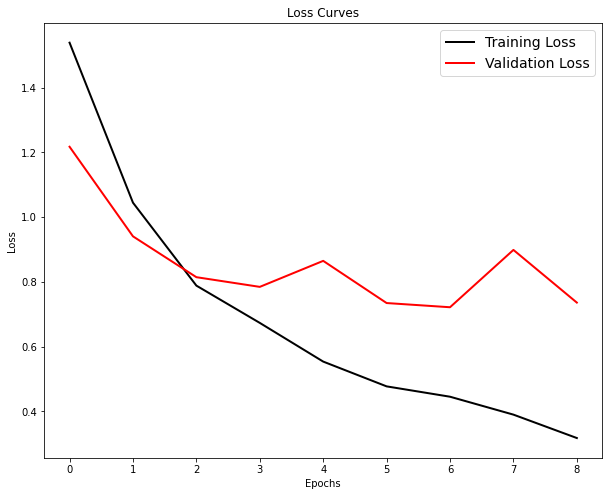

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=[10,8])
plt.plot(result.history['loss'], 'black', linewidth=2.0)
plt.plot(result.history['val_loss'], 'red', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14, loc='best')
plt.title('Loss Curves', fontsize=12)
plt.ylabel('Loss', fontsize=10)
plt.xlabel('Epochs', fontsize=10)
plt.show()

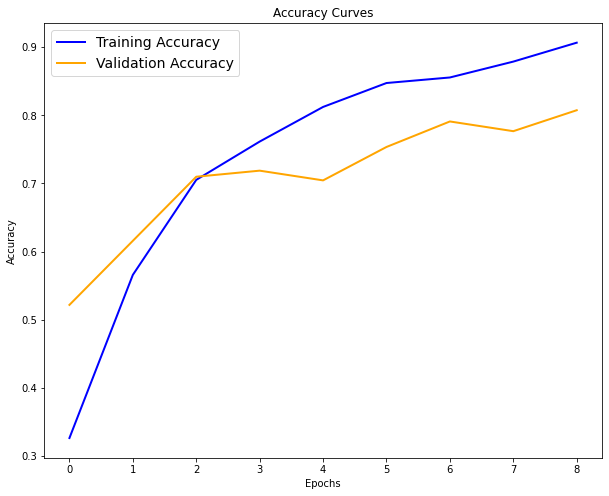

In [35]:
plt.figure(figsize=[10,8])
plt.plot(result.history['accuracy'], 'blue', linewidth=2.0)
plt.plot(result.history['val_accuracy'], 'orange', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14, loc='best')
plt.title('Accuracy Curves', fontsize=12)
plt.ylabel('Accuracy', fontsize=10)
plt.xlabel('Epochs', fontsize=10)
plt.show()